In [1]:
import implementations as imp
from implementations import ImagePacker
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
airplane_train_images = imp.read_images(
    "/Users/sameergururajmathad/Documents/CSC - 481/Final Project/Dataset/train/airplanes", "gray"
)

In [3]:
car_train_images = imp.read_images(
    "/Users/sameergururajmathad/Documents/CSC - 481/Final Project/Dataset/train/cars", "gray"
)

In [4]:
ship_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/Dataset/train/ship", "gray")

In [5]:
airplane_test_images = imp.read_images(
    "/Users/sameergururajmathad/Documents/CSC - 481/Final Project/Dataset/test/airplanes", "gray"
)

In [6]:
car_test_images = imp.read_images(
    "/Users/sameergururajmathad/Documents/CSC - 481/Final Project/Dataset/test/cars", "gray"
)

In [7]:
ship_test_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/Dataset/test/ships", "gray")


In [8]:
train_packed = ImagePacker(data = [airplane_train_images, car_train_images, ship_train_images])


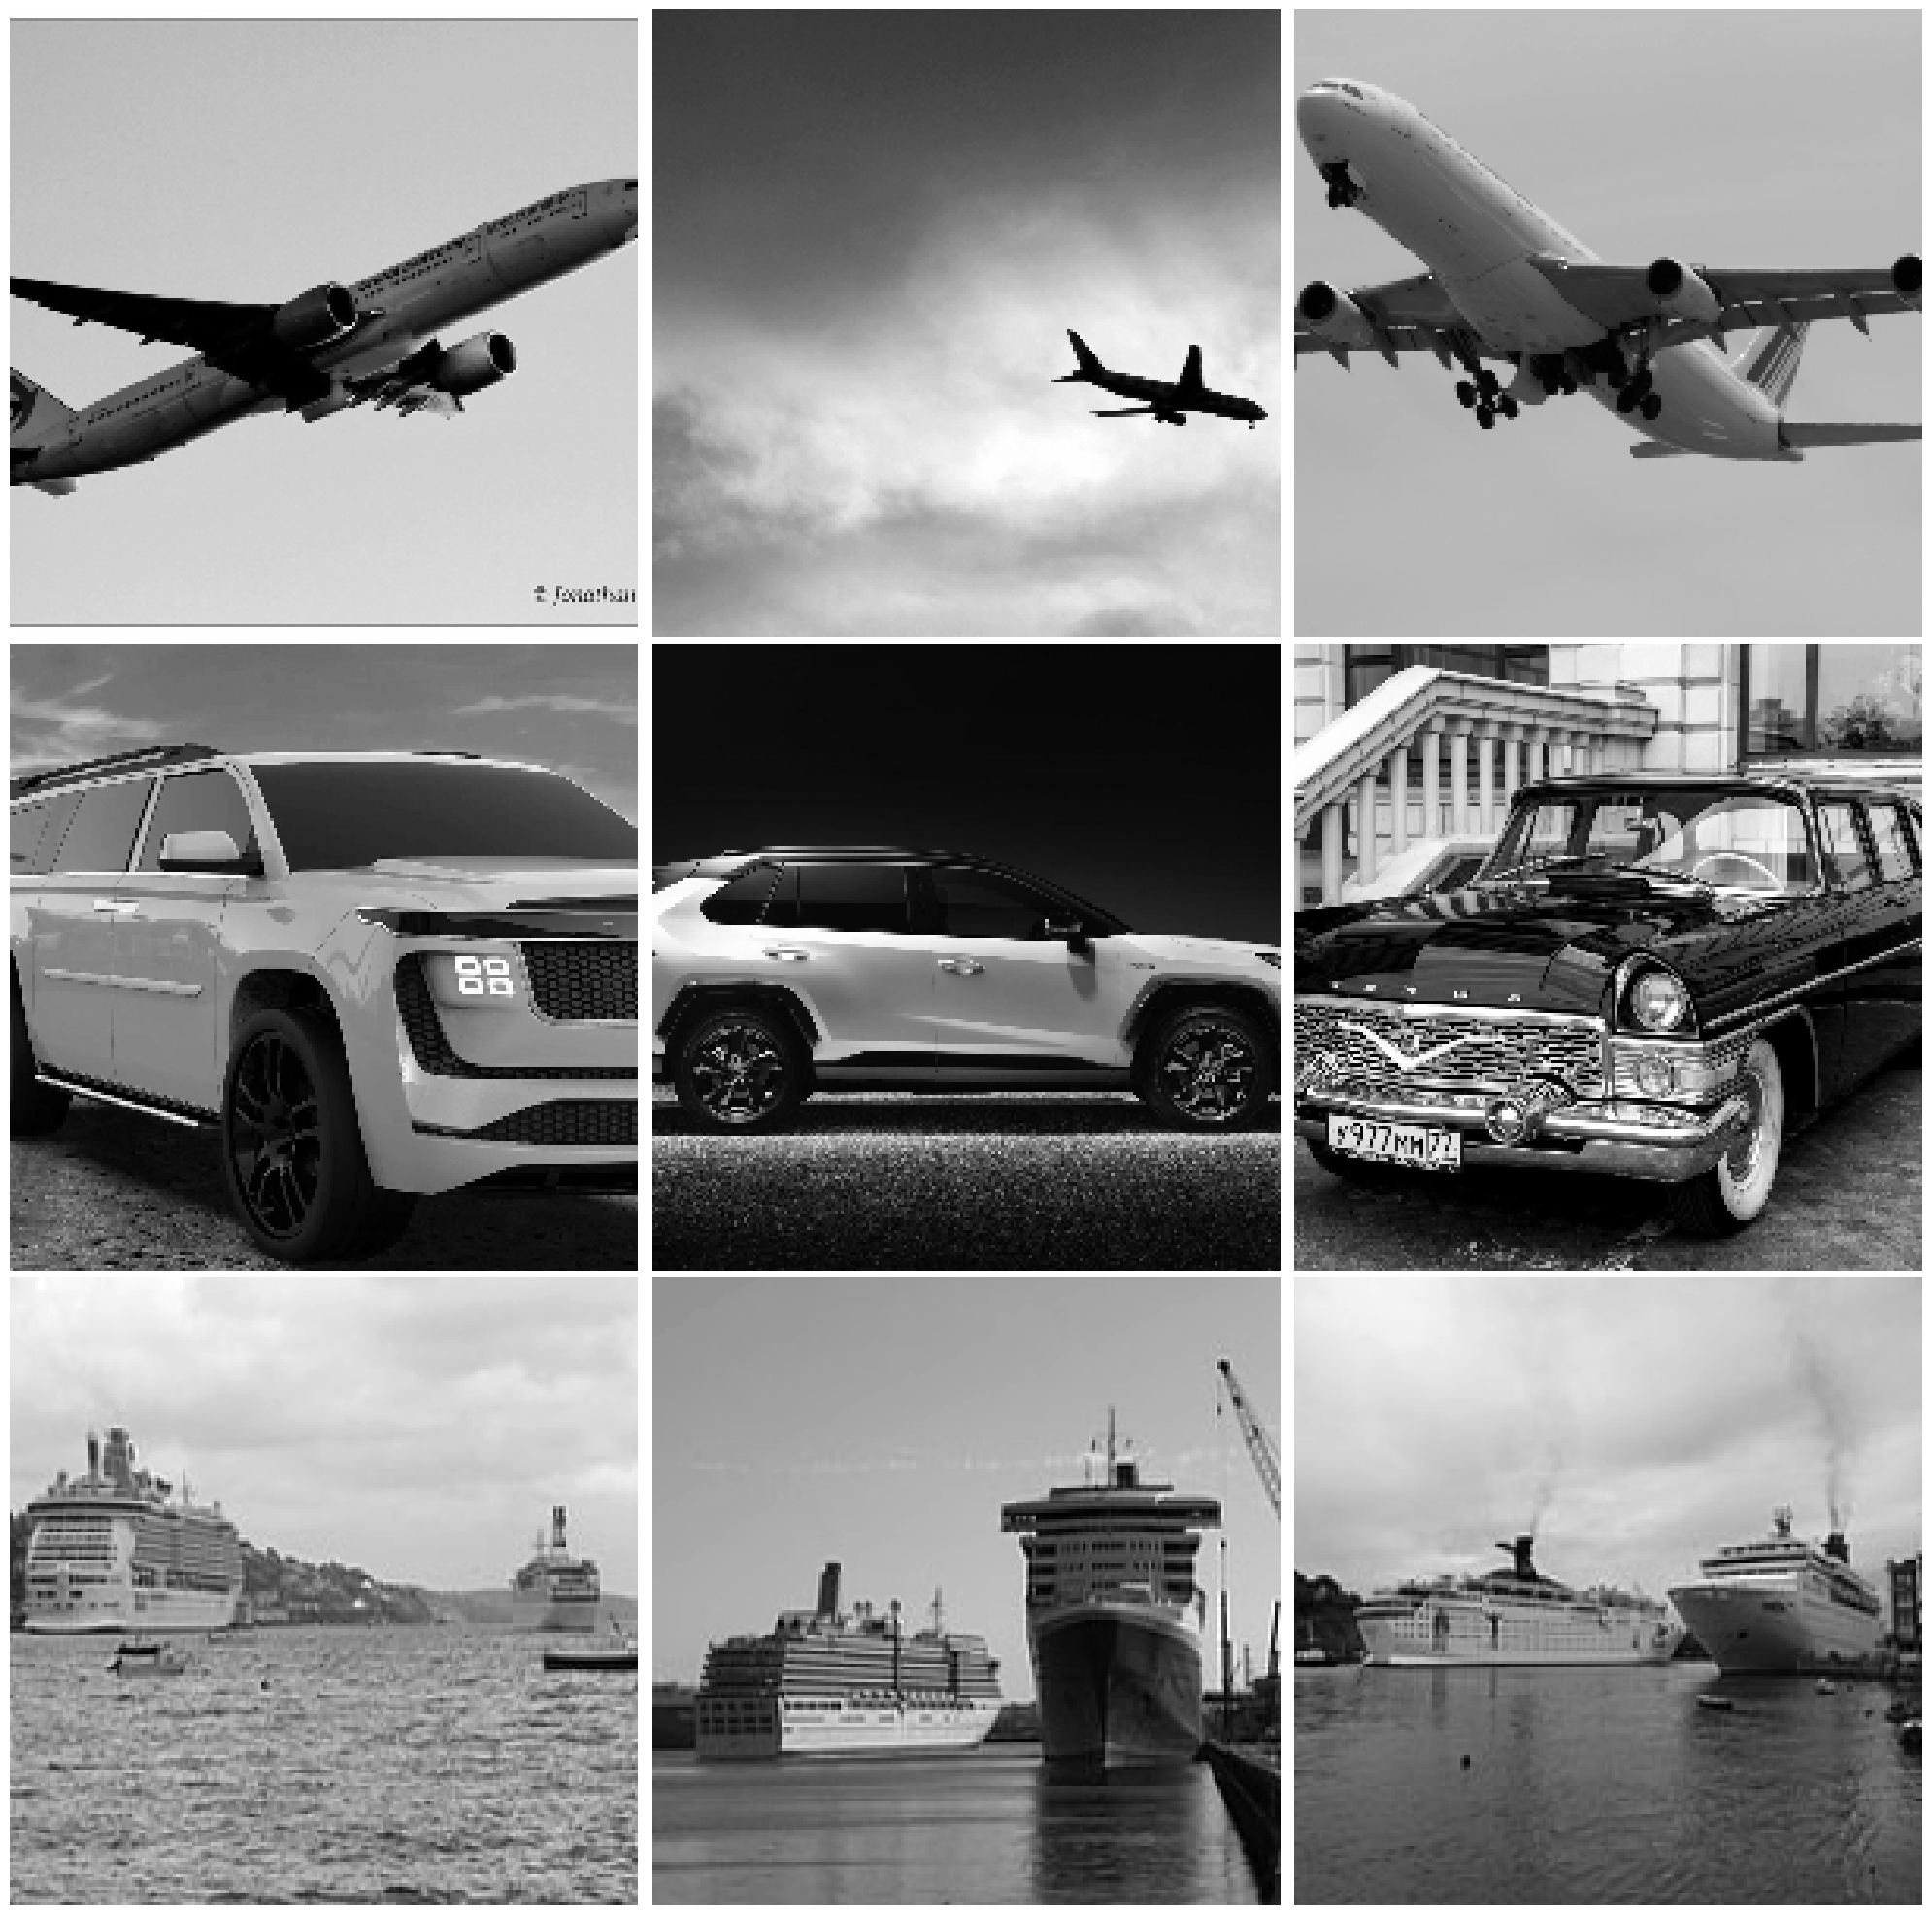

ImagePacker

In [9]:
train_packed

In [10]:
test_packed = ImagePacker(data = [airplane_test_images, car_test_images, ship_test_images])

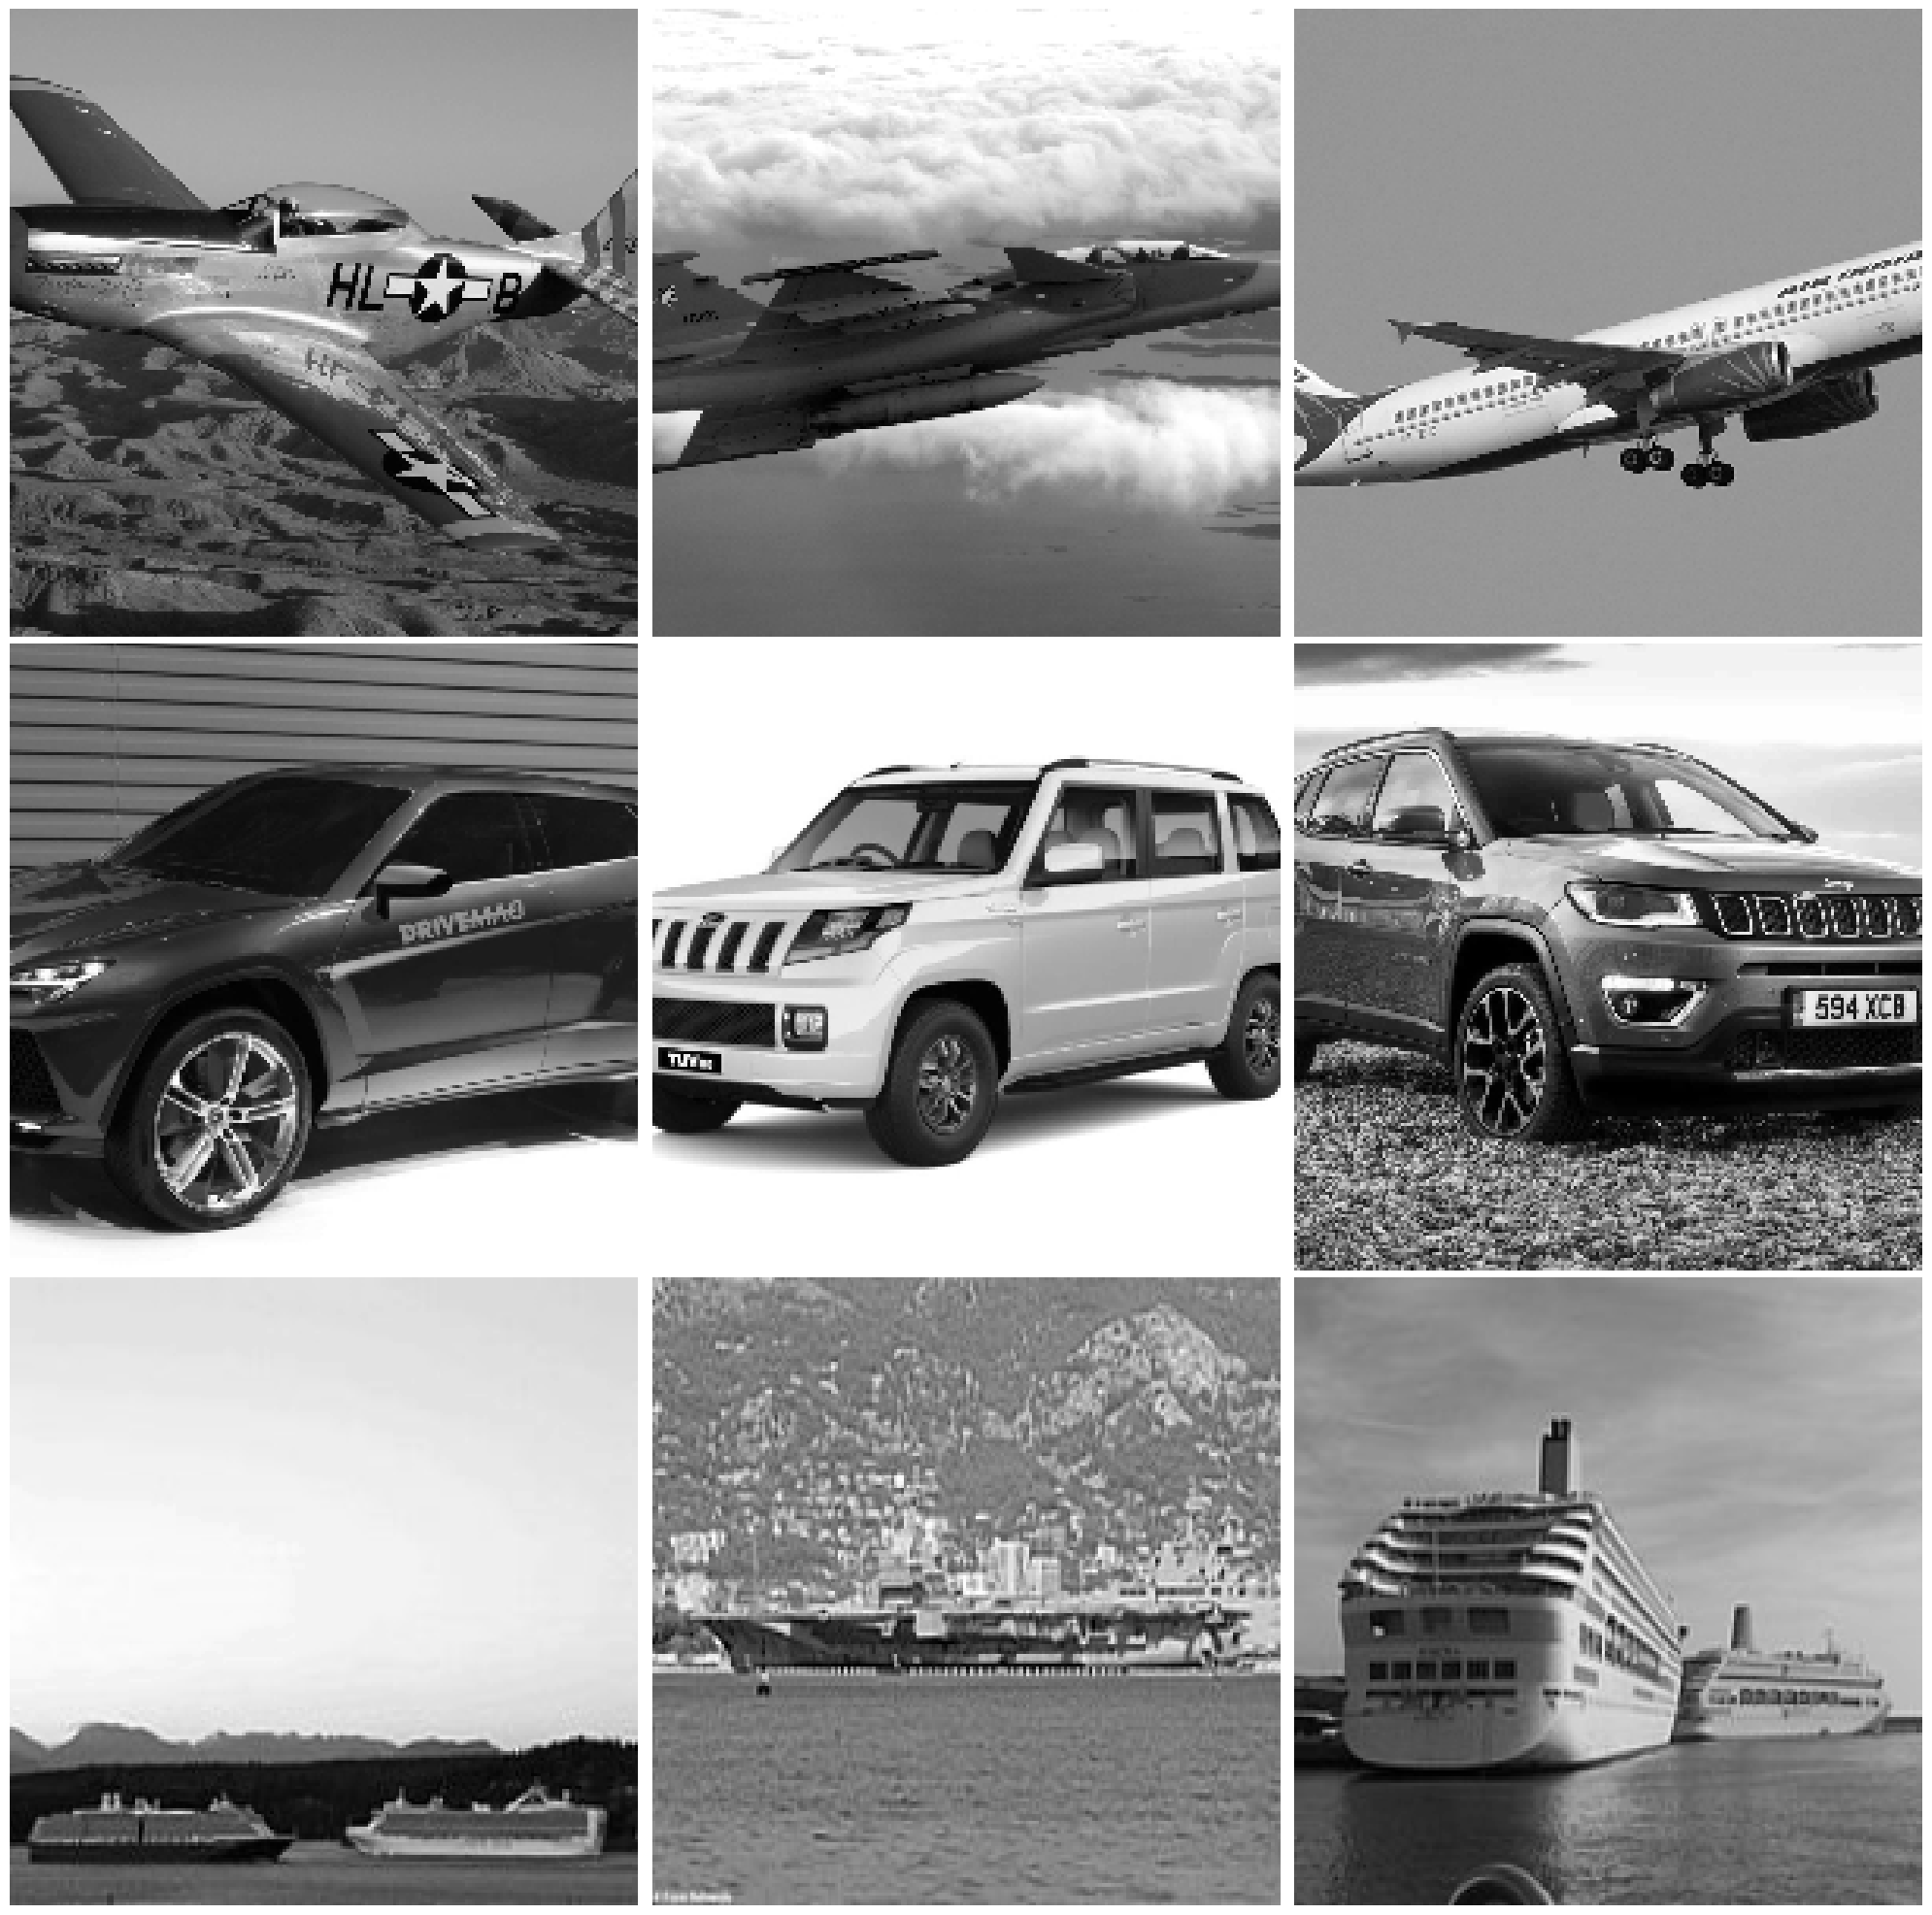

ImagePacker

In [11]:
test_packed

In [12]:
train_hog = train_packed.to_hog(append_label=[1,2,3])
test_hog = test_packed.to_hog(append_label=[1,2,3])

In [13]:
train_df = train_packed.descriptor_to_df(train_hog)
test_df = test_packed.descriptor_to_df(test_hog)

In [14]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,target
337,0.575191,0.001249,0.003159,0.001249,0.769478,0.000000,0.164648,0.002497,0.223452,0.989286,...,0.722160,0.006611,0.013890,0.179147,0.303736,0.164816,0.027174,0.137526,0.554152,1
1937,0.478157,0.278999,0.223862,0.424953,0.319067,0.442055,0.279045,0.211810,0.207075,0.384455,...,0.271936,0.140985,0.047138,0.108805,0.722200,0.164523,0.160572,0.045989,0.561760,2
380,0.700000,0.000000,0.000000,0.000000,0.700000,0.000000,0.141421,0.000000,0.000000,0.999992,...,0.359193,0.003440,0.005439,0.000000,0.799921,0.001720,0.166968,0.005160,0.450729,1
444,0.691144,0.002157,0.006822,0.010416,0.699860,0.030054,0.176070,0.011296,0.018050,0.987526,...,0.566429,0.002875,0.011818,0.001437,0.776517,0.002033,0.166362,0.004312,0.219844,1
1900,0.373825,0.012874,0.020460,0.050264,0.771439,0.052357,0.159762,0.008326,0.483416,0.941138,...,0.494669,0.030199,0.015220,0.010207,0.750769,0.009366,0.167674,0.064172,0.397592,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.638692,0.005244,0.013376,0.001748,0.745815,0.000000,0.156990,0.001748,0.104758,0.949477,...,0.349216,0.004963,0.009417,0.003309,0.804245,0.006617,0.165317,0.006617,0.451328,1
2617,0.223021,0.002833,0.004972,0.015097,0.784361,0.015927,0.162669,0.004250,0.555019,0.323067,...,0.596972,0.083295,0.082193,0.000000,0.255500,0.002973,0.090088,0.024237,0.745613,3
2351,0.275892,0.027131,0.013610,0.011541,0.778069,0.017887,0.164146,0.009156,0.538600,0.215088,...,0.189499,0.218774,0.167325,0.256128,0.721493,0.144343,0.190137,0.325427,0.373078,3
2392,0.366949,0.000000,0.001568,0.000000,0.796103,0.000000,0.162265,0.012394,0.452860,0.337484,...,0.451106,0.127367,0.103667,0.023370,0.685517,0.022748,0.166632,0.080724,0.514057,3


In [15]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,target
245,0.578872,0.000000,0.317165,0.000000,0.299026,0.545195,0.158583,0.083580,0.381478,0.893413,...,0.708959,0.135629,0.055792,0.007351,0.678745,0.000000,0.120972,0.022054,0.000000,2
444,0.585984,0.016454,0.005536,0.003054,0.744533,0.016923,0.211093,0.012209,0.238720,0.937406,...,0.199857,0.115725,0.012963,0.060528,0.712229,0.016911,0.146365,0.022981,0.642904,3
201,0.277737,0.107276,0.266434,0.567394,0.568588,0.118181,0.146154,0.123377,0.380250,0.063218,...,0.601593,0.112575,0.137405,0.024537,0.728135,0.006853,0.161850,0.008342,0.222346,2
226,0.622493,0.099254,0.236034,0.309948,0.301429,0.407387,0.395000,0.110818,0.160439,0.731798,...,0.345666,0.054452,0.068631,0.034213,0.756650,0.066261,0.187867,0.039503,0.507843,2
179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.552854,0.032263,0.010444,0.008031,0.701334,0.000000,0.167850,0.043997,0.413715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.416612,0.006305,0.005427,0.000000,0.780609,0.000000,0.156033,0.002306,0.438935,0.748582,...,0.476506,0.074263,0.046273,0.277126,0.338244,0.304006,0.183178,0.100719,0.661786,3
17,0.346097,0.006564,0.014287,0.006106,0.802833,0.014247,0.162189,0.015536,0.456773,0.856618,...,0.651589,0.016879,0.012789,0.010986,0.733878,0.007529,0.157705,0.007681,0.106298,1
401,0.000000,0.000000,0.000000,0.000000,0.705547,0.012634,0.157807,0.001579,0.690752,0.712921,...,0.640380,0.050776,0.024331,0.104943,0.646769,0.033375,0.175976,0.054100,0.349874,3
265,0.758671,0.146221,0.122493,0.213659,0.321483,0.151284,0.344801,0.014322,0.311532,0.781513,...,0.448193,0.060222,0.032586,0.129303,0.487951,0.209820,0.285761,0.227224,0.601917,2


In [16]:
train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:,-1]
test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:,-1]

In [17]:
model = SVC()
model.fit(train_X, train_y)


SVC()

In [18]:
predictions = model.predict(test_X)


In [19]:
f"Accuracy: {accuracy_score(test_y, predictions)*100} %"

'Accuracy: 88.65979381443299 %'